{'m00': 319.5, 'm10': 122237.33333333333, 'm01': 143353.16666666666, 'm20': 46869810.75, 'm11': 54845872.541666664, 'm02': 64320425.25, 'm30': 18010946031.7, 'm21': 21029904185.6, 'm12': 24608730573.066666, 'm03': 28859958958.550003, 'mu20': 103095.06785776466, 'mu11': 461.5300165191293, 'mu02': 768.3067727386951, 'mu30': 164146.66868972778, 'mu21': 18037.0027538985, 'mu12': -522.4098909441964, 'mu03': -100.4541015625, 'nu20': 1.0099413731624352, 'nu11': 0.004521246926012909, 'nu02': 0.0075264977577807176, 'nu30': 0.08996113312217421, 'nu21': 0.00988523994316084, 'nu12': -0.0002863084954371199, 'nu03': -5.505420777325833e-05}


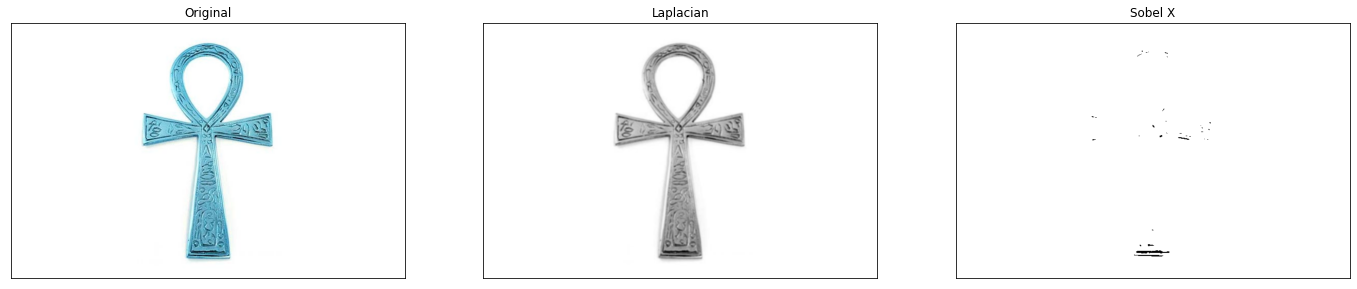

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,100,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 


contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))
 
cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)


plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


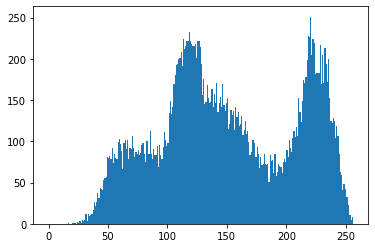

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('qorentks.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()


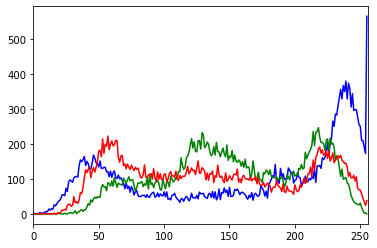

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('qorentks.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

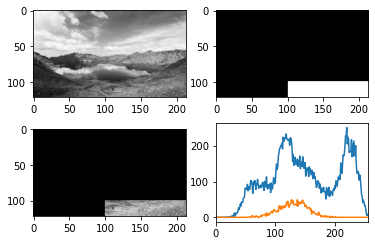

In [8]:
img = cv2.imread('qorentks.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

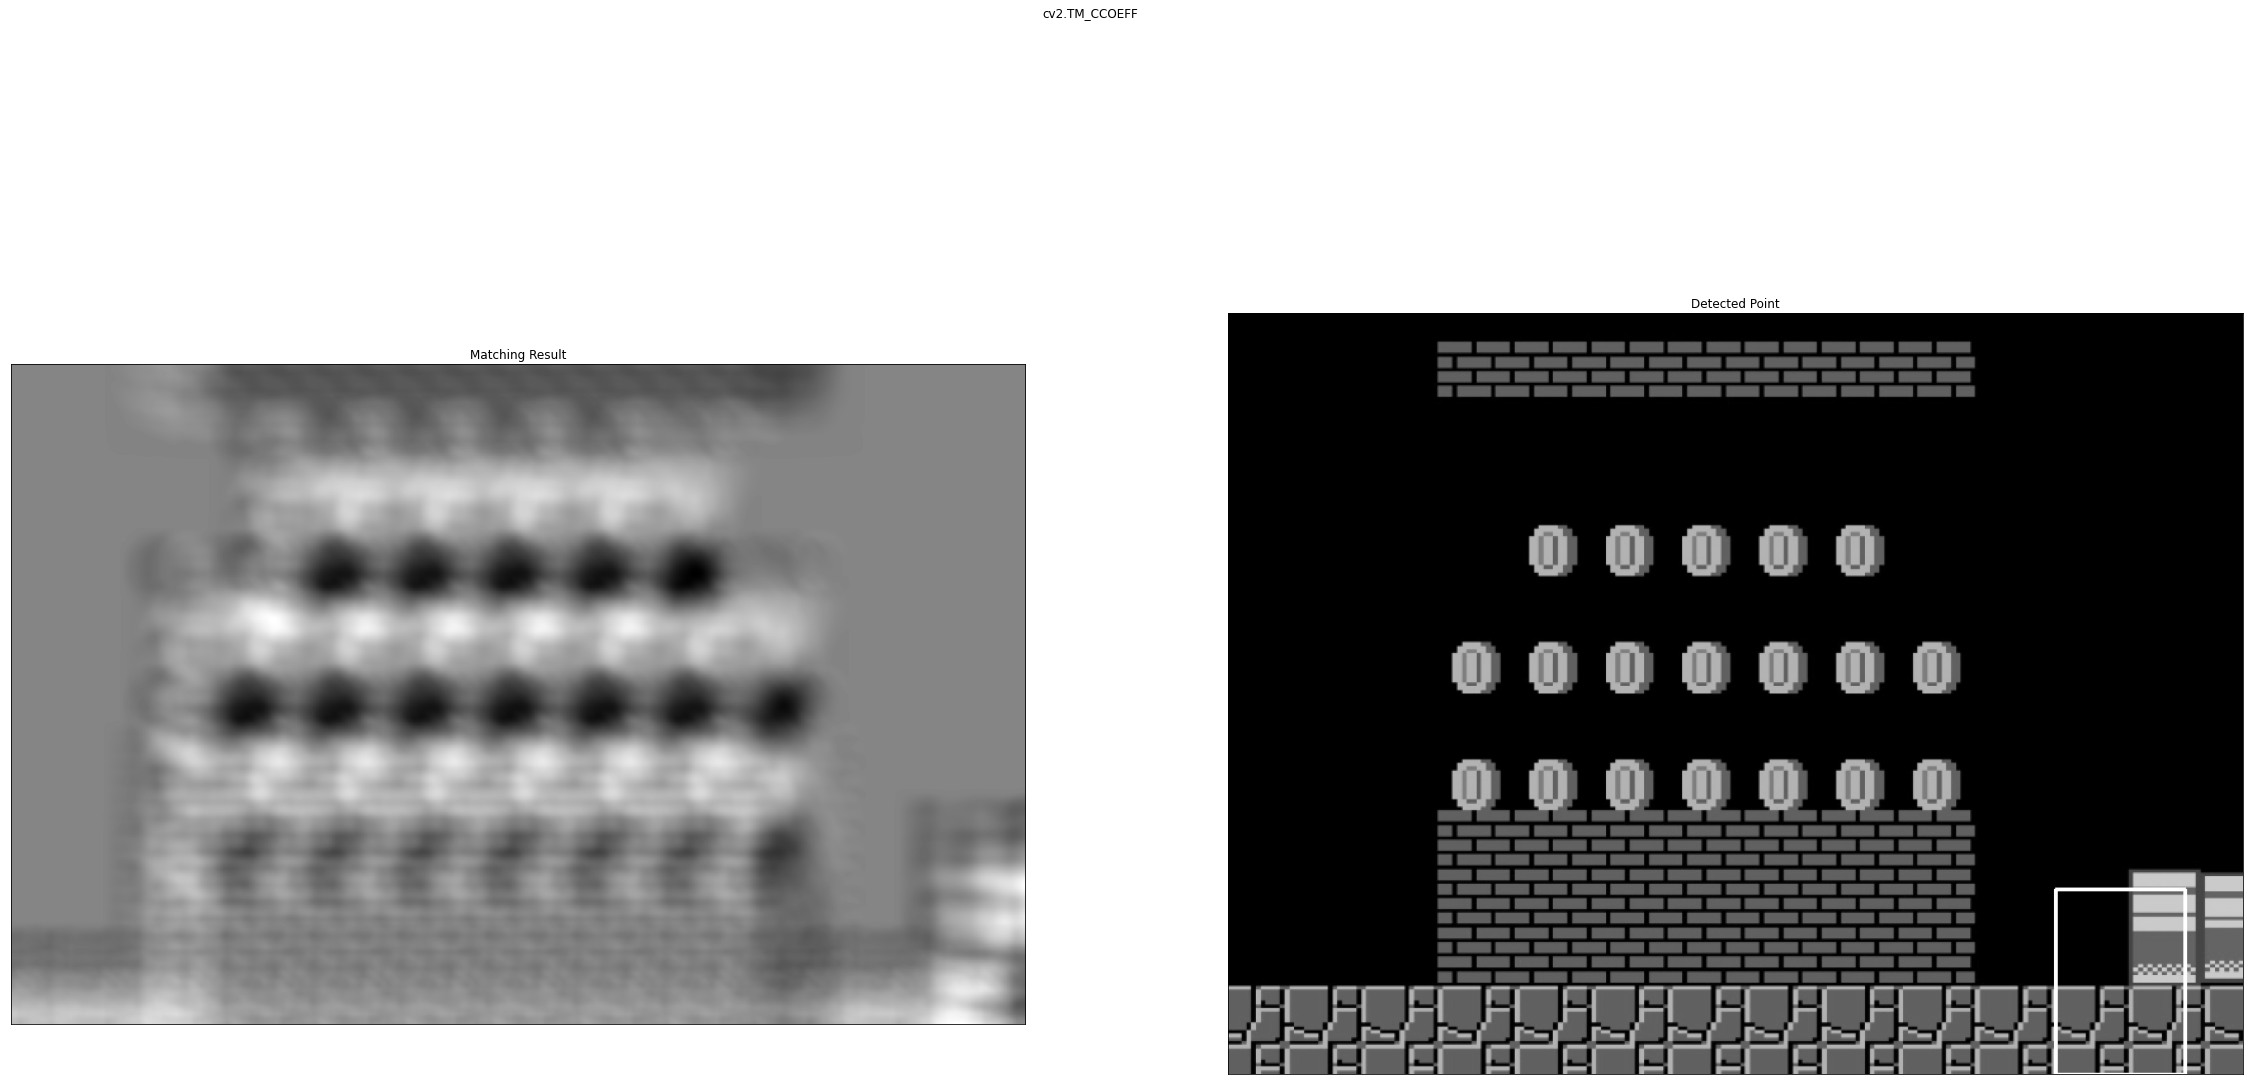

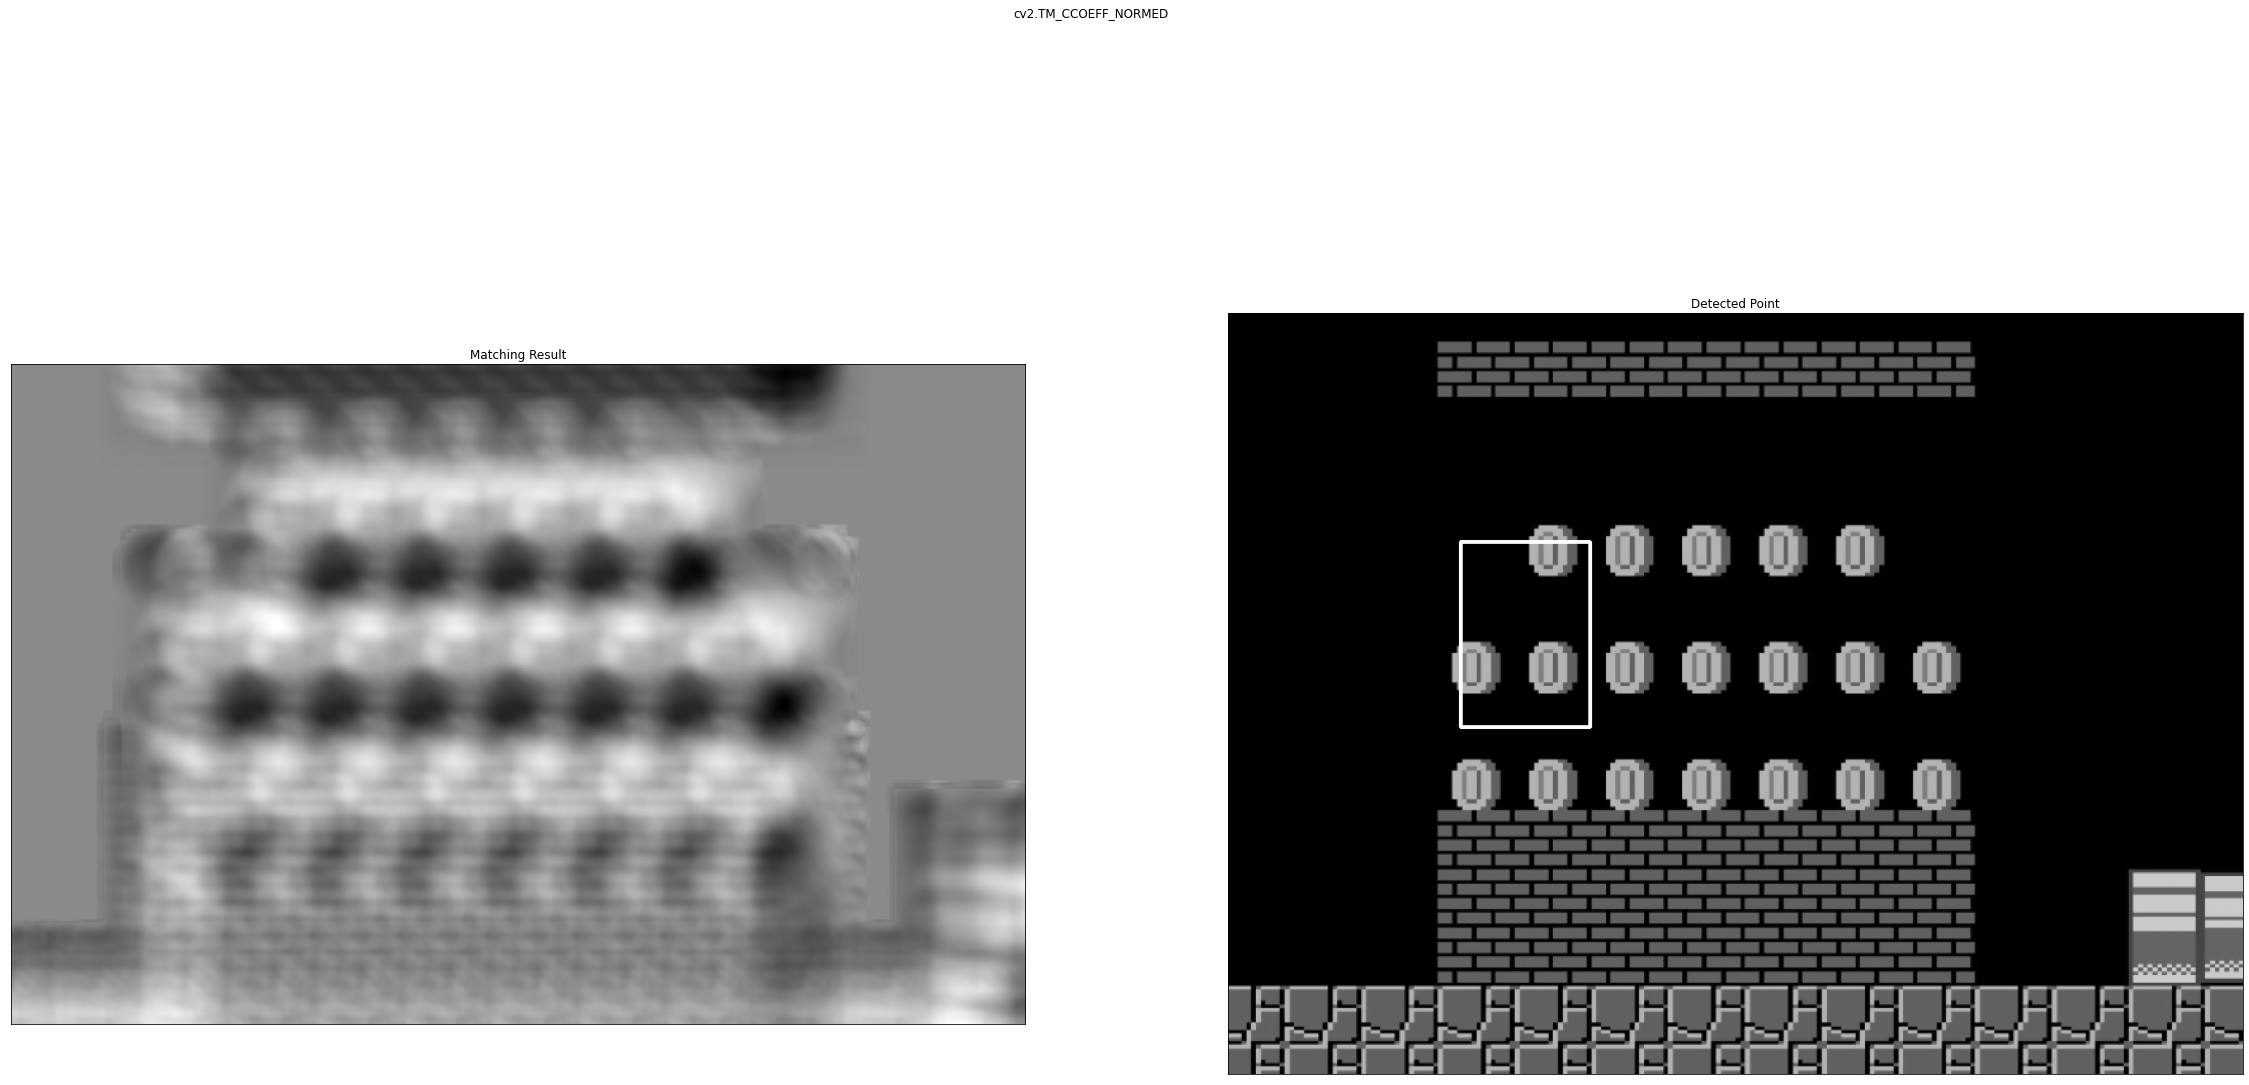

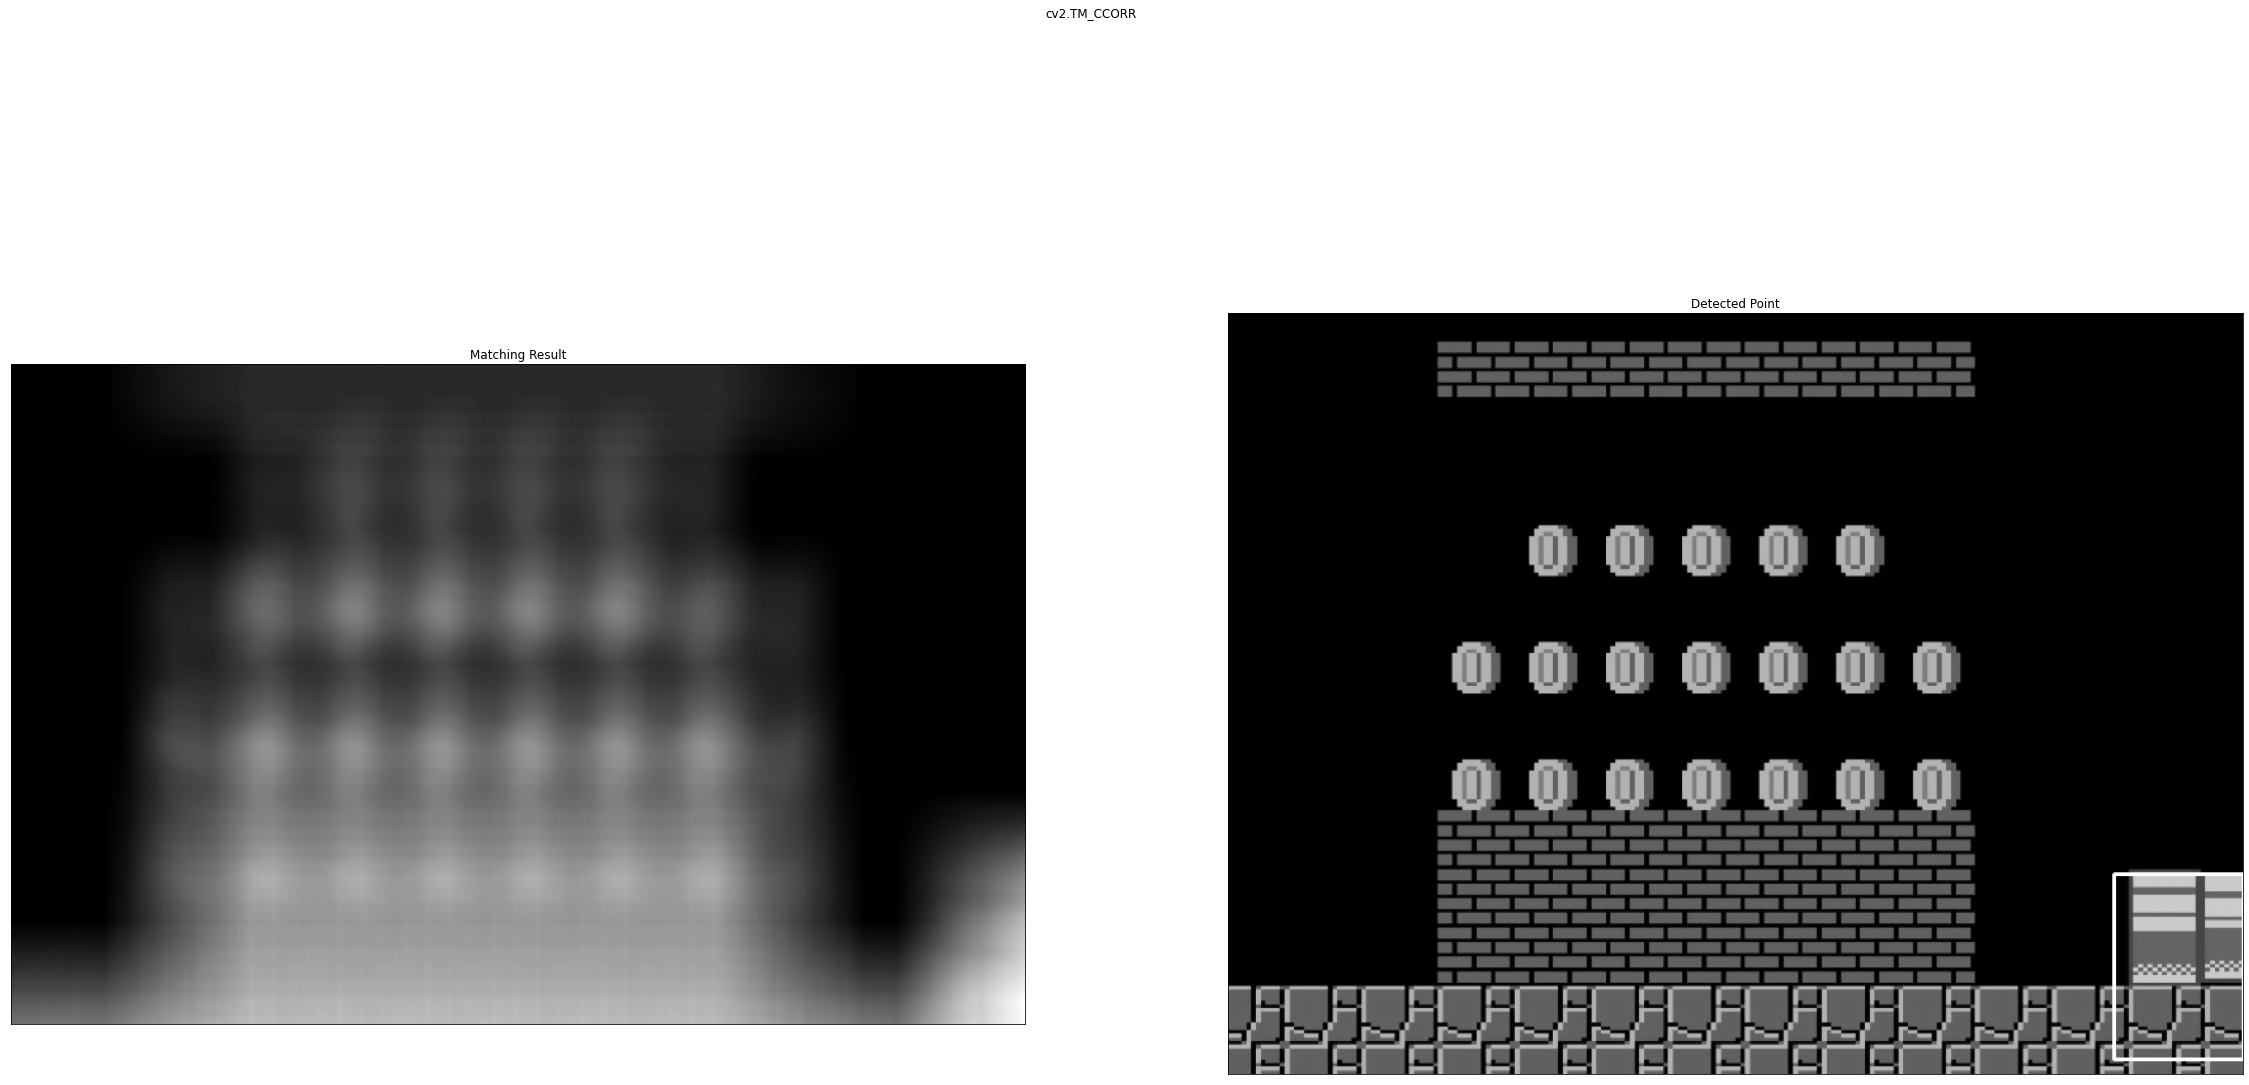

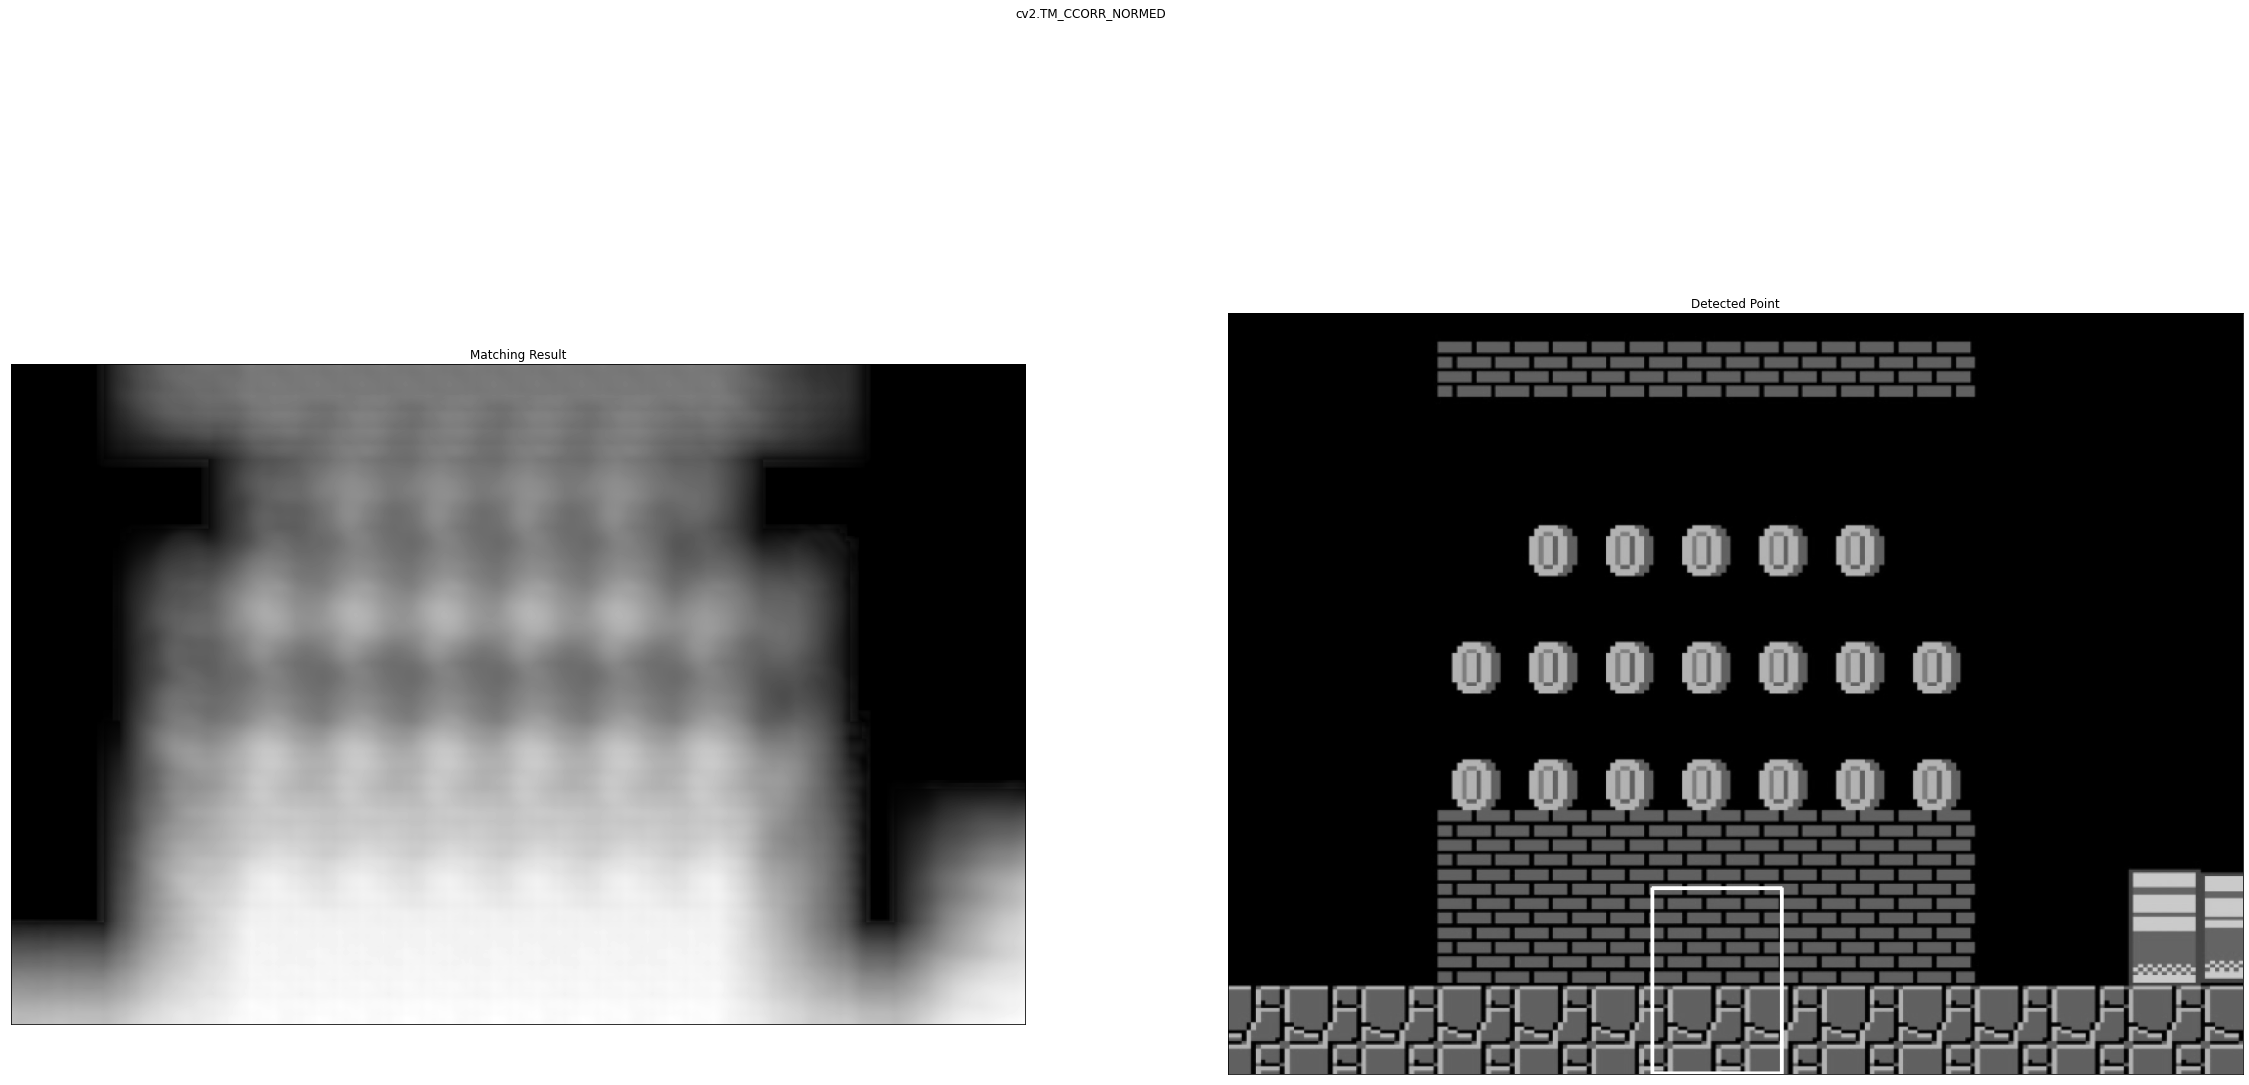

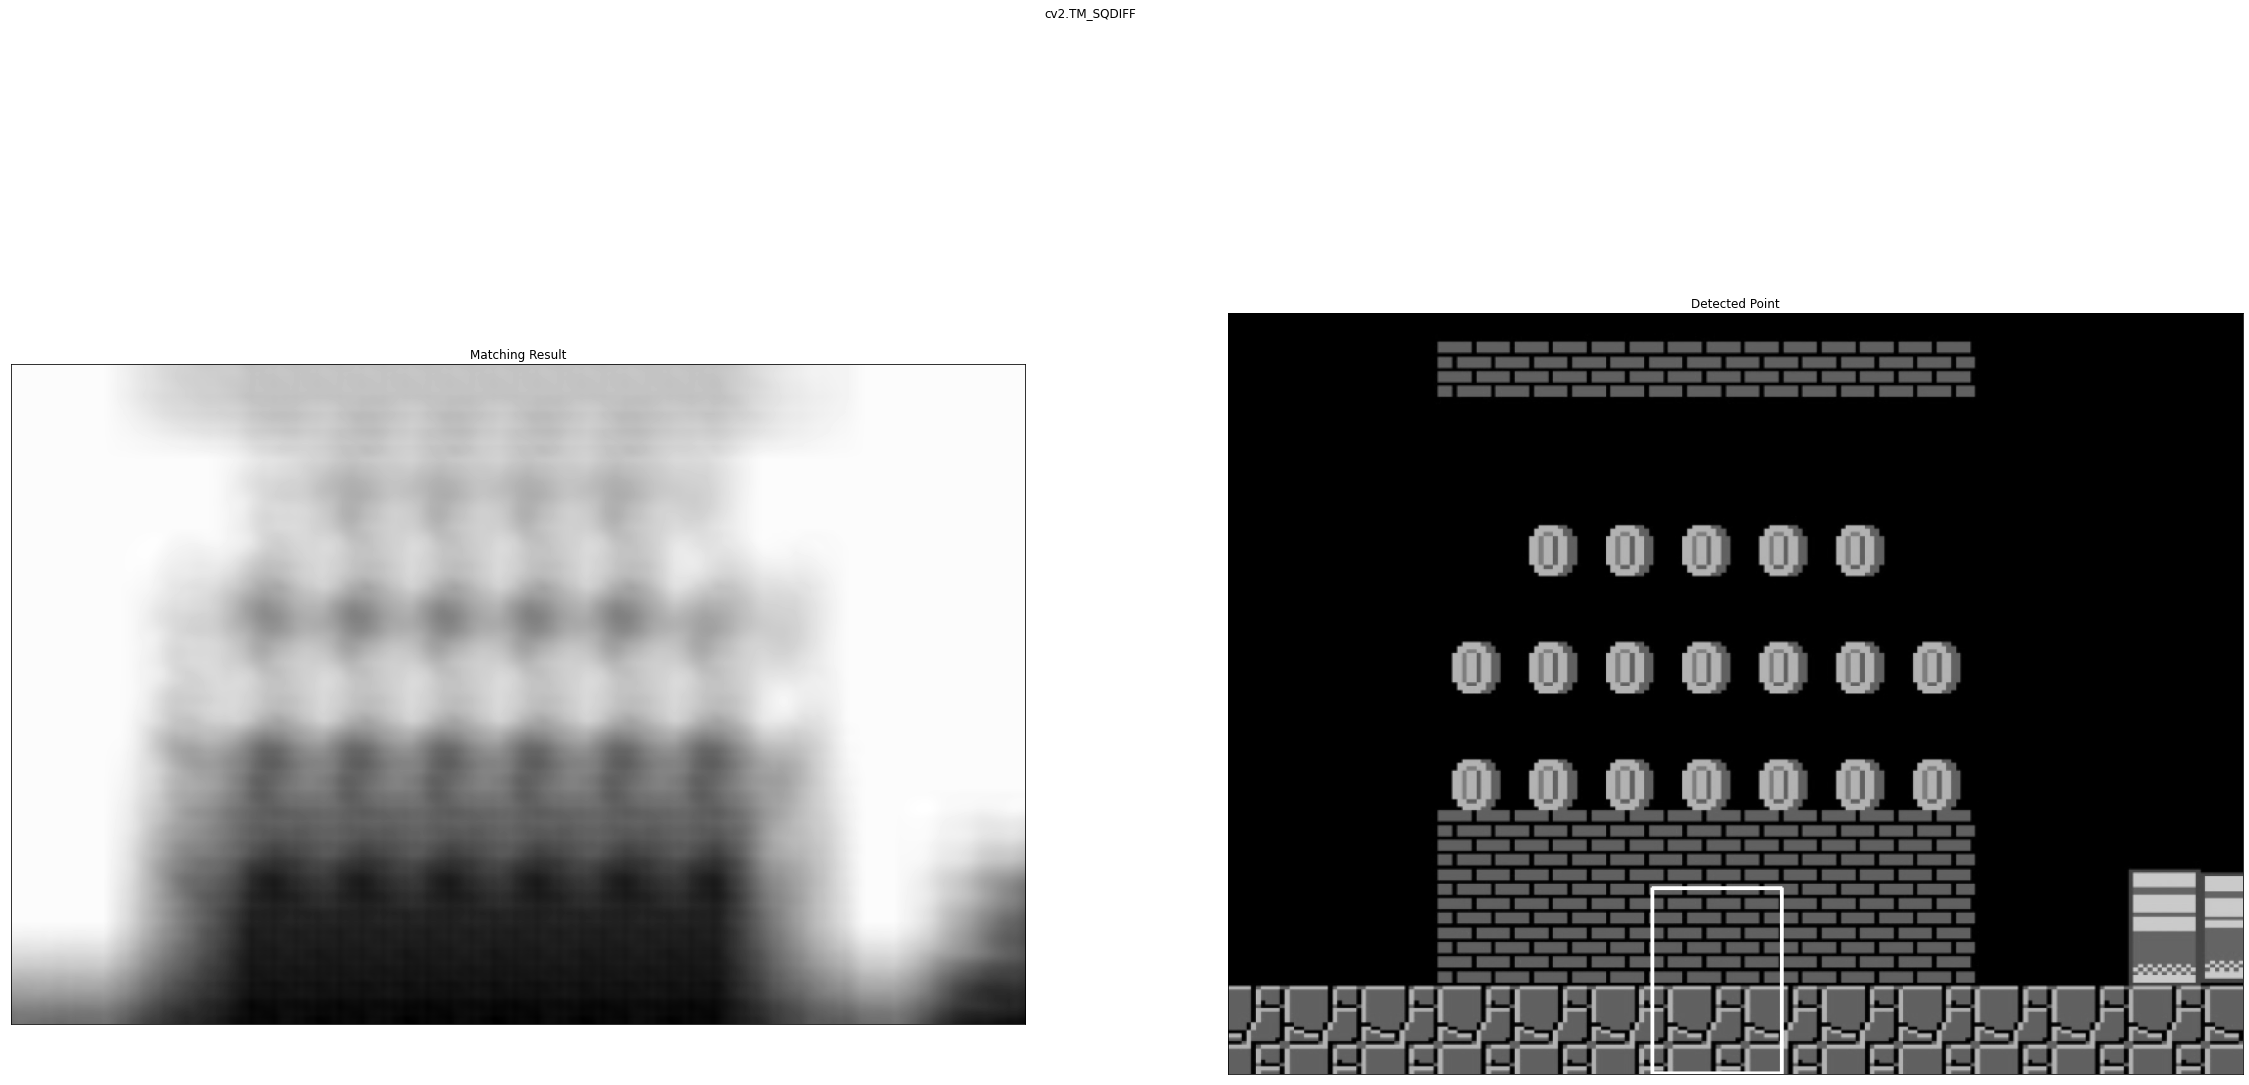

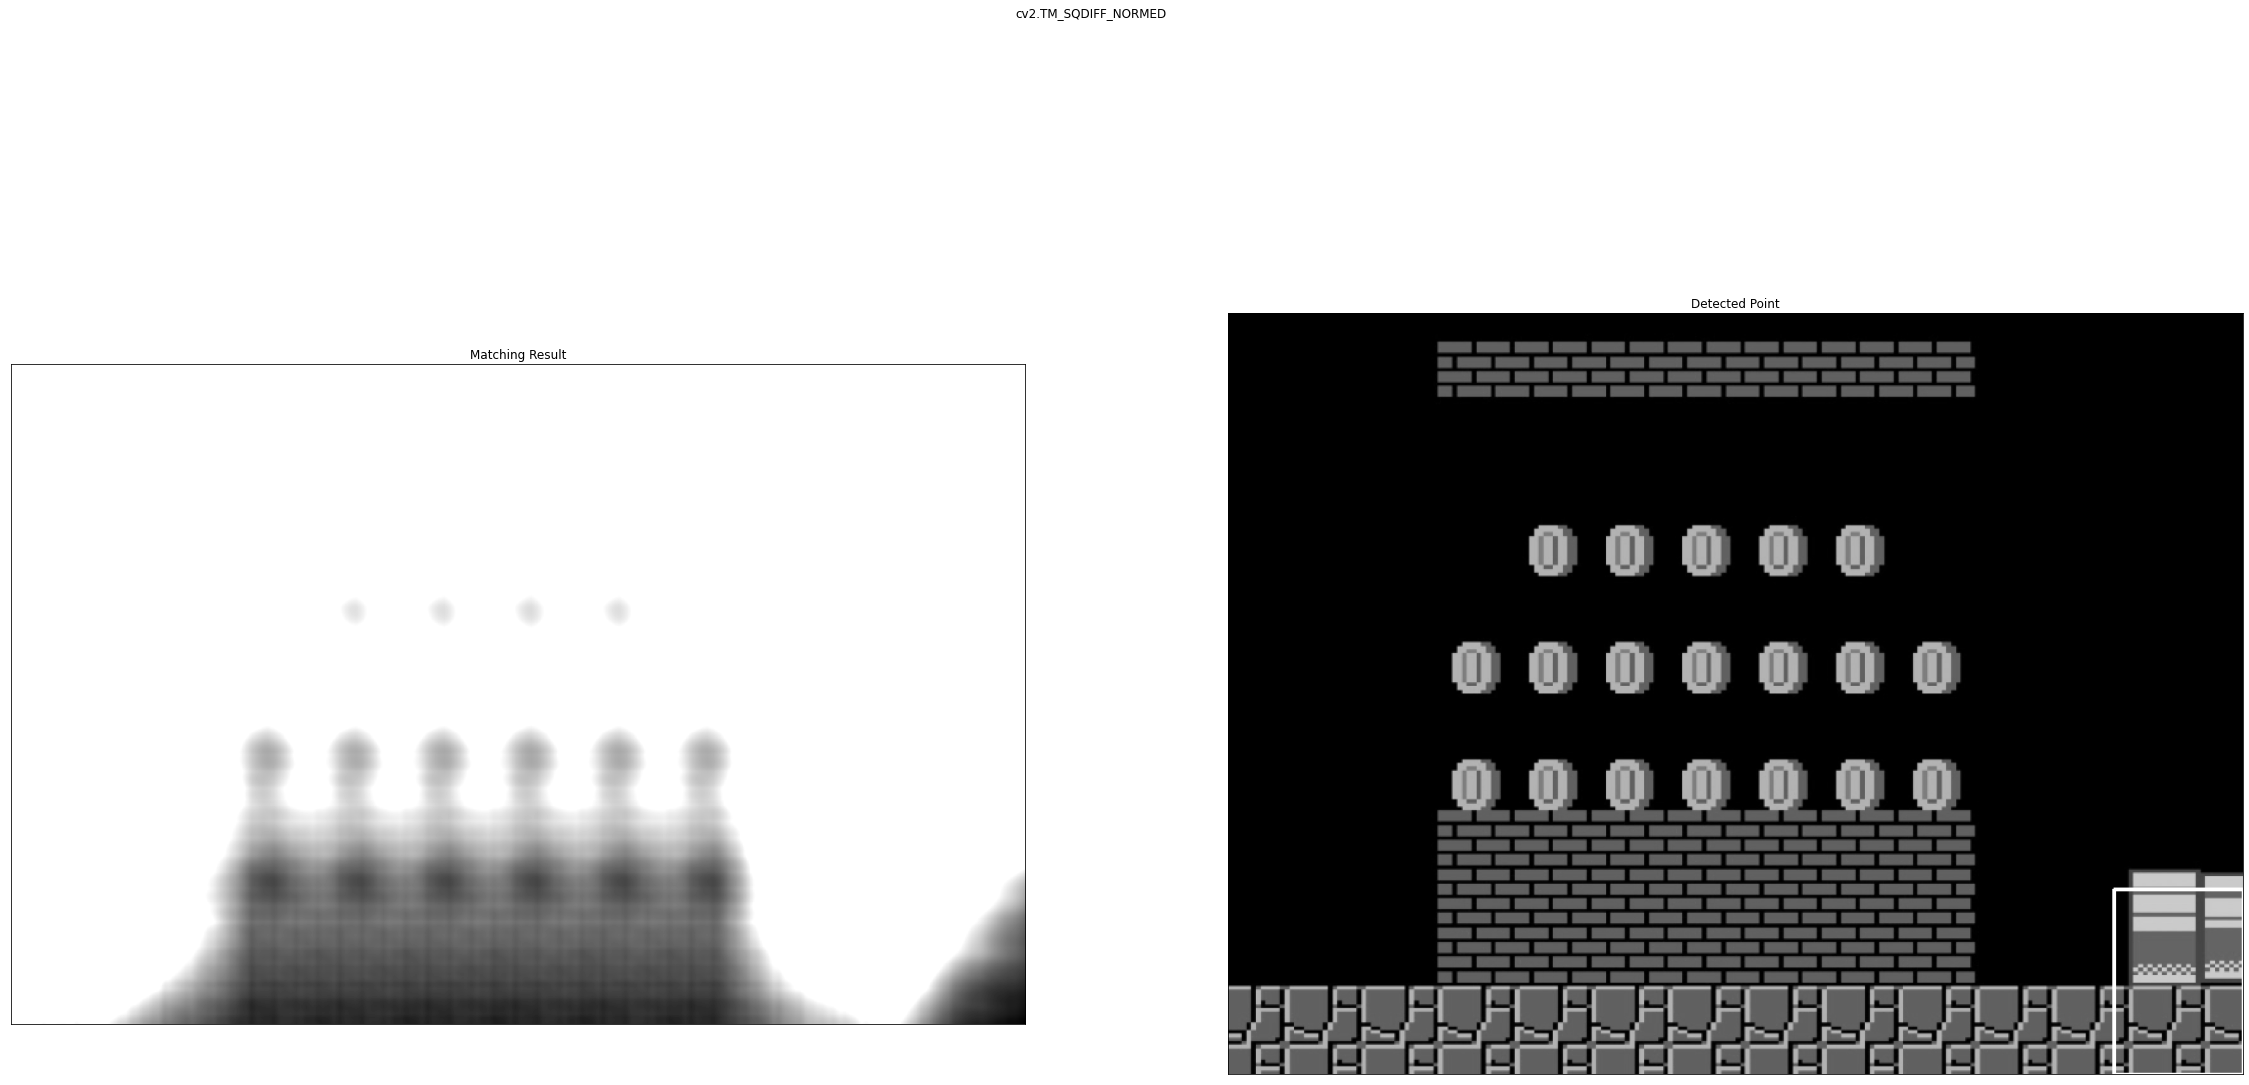

In [10]:
img = cv2.imread('mario.png',0) #mario
img2 = img.copy()
template = cv2.imread('20201105_125557.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

